In [1]:
import numpy as np
import pandas as pd
import math

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Chebyshev's Bounds ##

In [2]:
births = pd.read_csv('baby.csv')

In [3]:
births.columns

Index(['Birth Weight', 'Gestational Days', 'Maternal Age', 'Maternal Height',
       'Maternal Pregnancy Weight', 'Maternal Smoker'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Birth Weight'}>,
        <AxesSubplot:title={'center':'Gestational Days'}>],
       [<AxesSubplot:title={'center':'Maternal Age'}>,
        <AxesSubplot:title={'center':'Maternal Height'}>],
       [<AxesSubplot:title={'center':'Maternal Pregnancy Weight'}>,
        <AxesSubplot:>]], dtype=object)

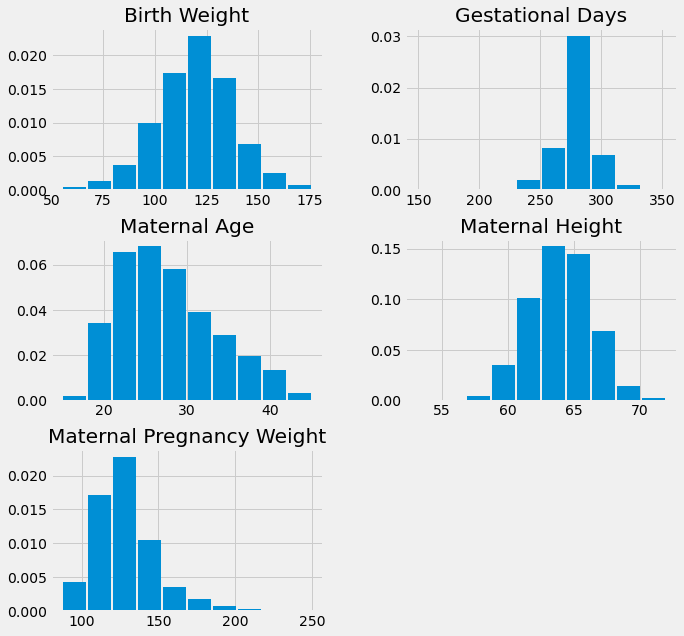

In [4]:
births.hist(figsize=(10,10), density=True, rwidth=0.9)

In [5]:
mpw = births['Maternal Pregnancy Weight']
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

(128.4787052810903, 20.725449704280415)

In [6]:
within_3_SDs = births[(births['Maternal Pregnancy Weight']>=(mean - 3*sd)) & (births['Maternal Pregnancy Weight']<=(mean + 3*sd))]

In [7]:
len(within_3_SDs)/len(births)

0.9863713798977853

In [8]:
1 - 1/9

0.8888888888888888

In [9]:
# See if Chebyshev's bounds work for different distributions

for k in births.columns:
    values = births[k]
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(k)
    for z in np.arange(2, 6):
        chosen = births[(births[k]>=(mean - z*sd)) & (births[k]<=(mean + z*sd))]
        proportion = len(chosen)/len(births)
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '%')


Birth Weight
Average plus or minus 2 SDs: 94.89 %
Average plus or minus 3 SDs: 99.57 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %

Gestational Days
Average plus or minus 2 SDs: 93.78 %
Average plus or minus 3 SDs: 98.64 %
Average plus or minus 4 SDs: 99.57 %
Average plus or minus 5 SDs: 99.83 %

Maternal Age
Average plus or minus 2 SDs: 94.89 %
Average plus or minus 3 SDs: 99.91 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %

Maternal Height
Average plus or minus 2 SDs: 97.19 %
Average plus or minus 3 SDs: 99.66 %
Average plus or minus 4 SDs: 99.91 %
Average plus or minus 5 SDs: 100.0 %

Maternal Pregnancy Weight
Average plus or minus 2 SDs: 95.06 %
Average plus or minus 3 SDs: 98.64 %
Average plus or minus 4 SDs: 99.49 %
Average plus or minus 5 SDs: 99.91 %

Maternal Smoker
Average plus or minus 2 SDs: 100.0 %
Average plus or minus 3 SDs: 100.0 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %


## Standard Units ##

In [10]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x))/np.std(x)

In [11]:
births

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


In [12]:
ages = births['Maternal Age']

In [13]:
ages_standard_units = standard_units(ages)

In [14]:
np.mean(ages_standard_units), np.std(ages_standard_units)

(-6.714295975160657e-17, 1.0000000000000002)

In [15]:
both = pd.DataFrame({'Age in Years': ages,
    'Age in Standard Units': ages_standard_units})
both

,Age in Years,Age in Standard Units
0,27,-0.039255
1,33,0.992496
2,28,0.132704
3,23,-0.727088
4,25,-0.383171
...,...,...
1169,27,-0.039255
1170,24,-0.555130
1171,30,0.476621
1172,21,-1.071005


In [16]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.815360404190896)

array([[<AxesSubplot:title={'center':'Age in Years'}>]], dtype=object)

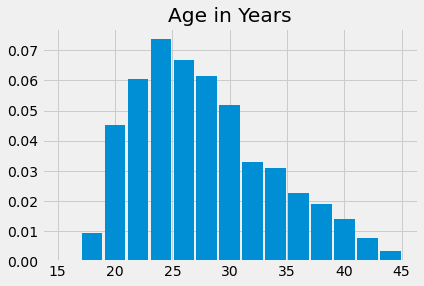

In [17]:
both.hist('Age in Years', bins = np.arange(15, 46, 2), density=True, rwidth=0.9 )

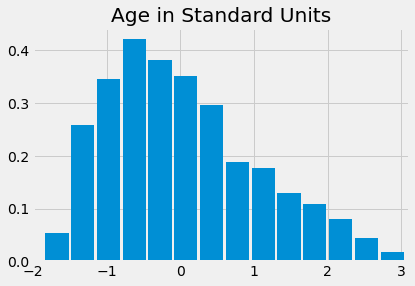

In [18]:
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35), density=True, rwidth=0.9 )
plt.xlim(-2, 3.1);

## The SD and Bell Shaped Curves ##

array([[<AxesSubplot:title={'center':'Maternal Height'}>]], dtype=object)

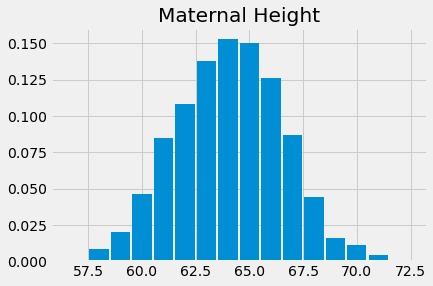

In [19]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1), density=True, rwidth=0.9 )

In [20]:
heights = births['Maternal Height']
np.mean(heights), np.std(heights)

(64.04940374787053, 2.5250254409674358)

array([[<AxesSubplot:title={'center':'Birth Weight'}>]], dtype=object)

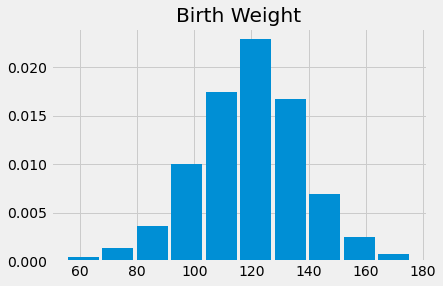

In [21]:
births.hist('Birth Weight', density=True, rwidth=0.9 )

In [22]:
bw = births['Birth Weight']
mean_w = np.mean(bw)
sd_w = np.std(bw)
mean_w, sd_w

(119.46252129471891, 18.320863702202775)